# **Spam Likely | An Email Spam Classifier**

#### By Jackson Trader, Diego Lara, Mark Pack, & Alex Bryant
#### CS 46200 - Introduction To Artificial Intelligence

##### [Dataset from Kaggle](https://www.kaggle.com/datasets/ashfakyeafi/spam-email-classification)
##### [Link to GitHub repository](https://github.com/jackson-trader/CS462-Email-Spam-Classifier.git)


---

## **Import Libraries**

In [145]:
# Numpy and pandas libraries for numerical computing and data manipulation
import numpy as np
import pandas as pd

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# To split data into training and testing sets
from sklearn.model_selection import train_test_split

# For converting text into number vectors
from sklearn.feature_extraction.text import TfidfVectorizer

# Import machine learning models
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.naive_bayes import MultinomialNB # Naive Bayes
from sklearn.svm import LinearSVC # Support Vector Machine Classifier

# For evaluating performance of the models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

## **Load the Dataset**

In [108]:
# Loading the dataset from the GitHub repository into a pandas DataFrame object
df = pd.read_csv('https://raw.githubusercontent.com/jackson-trader/CS462-Email-Spam-Classifier/refs/heads/main/email_spam_data.csv')

## **View the Dataset**

In [109]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Count Columns & Ratio Between Ham vs. Spam

*   The dataset contains 5571 rows of data and 2 columns: Category & Message
*   The dataset is currently unbalanced: 4825 ham (legit) : 747 spam



In [110]:
print('Columns of dataset:')
print(df.columns)

print('\nRatios between ham and spam: ')
print(df['Category'].value_counts())

Columns of dataset:
Index(['Category', 'Message'], dtype='object')

Ratios between ham and spam: 
Category
ham     4825
spam     747
Name: count, dtype: int64


## **Preprocess the Data**

### Remove Missing Values

In [111]:
# Removes rows where either Category or Message is missing
df = df.dropna(subset=['Category', 'Message'])

### Remove Duplicate Rows

In [112]:
df = df.drop_duplicates()

### Fix Indexing of Dataset After Preprocessing

In [113]:
df.reset_index(drop=True, inplace=True)

### Change Category Labels (ham = 0, spam = 1)

In [114]:
df['Category'] = df['Category'].map({
    'ham': 0,
    'spam': 1
})

### Lowercase all Messages

In [115]:
df['Message'] = df['Message'].str.lower()

### View Dataset Again

In [116]:
df

,Category,Message
0,0,"go until jurong point, crazy.. available only ..."
1,0,ok lar... joking wif u oni...
2,1,free entry in 2 a wkly comp to win fa cup fina...
3,0,u dun say so early hor... u c already then say...
4,0,"nah i don't think he goes to usf, he lives aro..."
...,...,...
5152,1,this is the 2nd time we have tried 2 contact u...
5153,0,will ü b going to esplanade fr home?
5154,0,"pity, * was in mood for that. so...any other s..."
5155,0,the guy did some bitching but i acted like i'd...


*   After preprocessing, we now have 5156 rows of data.
*   The dataset is still unbalanced though.

## **Data Visualization**

### Pie Graph of Ratio of Spam vs. Legit

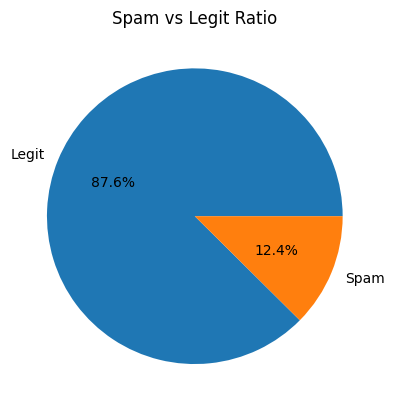

In [117]:
counts = df['Category'].value_counts()
counts.index = counts.index.map({1: 'Spam', 0: 'Legit'})

counts.plot(kind = 'pie', autopct = '%1.1f%%')
plt.ylabel('')
plt.title("Spam vs Legit Ratio")

# Show the Pie Graph
plt.show()

As you can see the data is unbalanced.

### WordCloud of Most Common Words in Spam vs. Legit

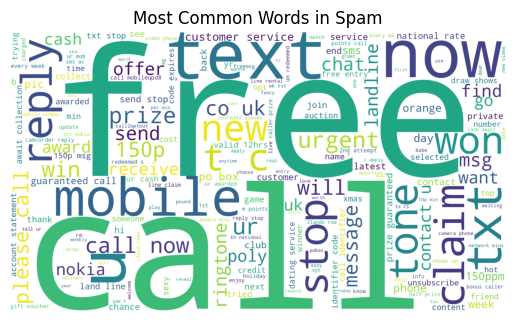

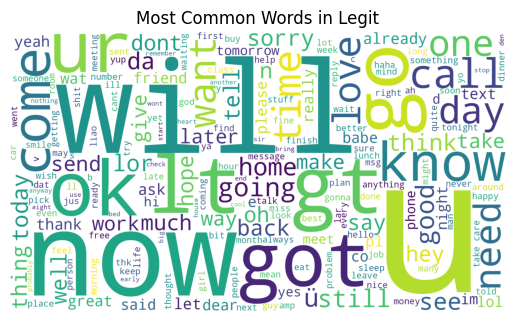

In [118]:
# Make one string for each spam and legit emails
spam_text = " ".join(df.loc[df["Category"] == 1, "Message"].astype(str))
legit_text = " ".join(df.loc[df["Category"] == 0, "Message"].astype(str))

# Spam WordCloud
wordcloud = WordCloud(
    width = 1920,
    height = 1080,
    background_color = 'white',
    stopwords = STOPWORDS
).generate(spam_text)
plt.title("Most Common Words in Spam")
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Legit WordCloud
wordcloud = WordCloud(
    width = 1920,
    height = 1080,
    background_color = 'white',
    stopwords = STOPWORDS
).generate(legit_text)
plt.imshow(wordcloud)
plt.axis("off")
plt.title("Most Common Words in Legit")
plt.show()


## **Split the Data**

Splitting the data into a train and test sets: <br>
* Train set contains 80% of data.
* Test set contains 20% of data.

In [119]:
X = df['Message'] # Independent variable
y = df['Category'] # Dependent variable (What we are predicting)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2
)

print('Training set size (80%): ', X_train.shape[0])
print('Testing set size (20%): ', X_test.shape[0])

Training set size (80%):  4125
Testing set size (20%):  1032


## **Feature Extraction**

Using TF-IDF because:
* It finds frequent words in a specific email, but rare across all emails.

In [132]:
# Transform the message data to feature vectors that can be used as input into the models

vectorizer = TfidfVectorizer(
    min_df = 2, # If word appears once then don't include it
    stop_words = 'english'
)

X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

## **Train the Models**

### Logistic Regression

In [136]:
lr = LogisticRegression()

# Training the Logistic Regression model with the training data
lr.fit(X_train_features, y_train)

LogisticRegression()

### Multinomial Naive Bayes

In [137]:
nb = MultinomialNB()

# Training the Multinomial Naive Bayes model with the training data
nb.fit(X_train_features, y_train)

MultinomialNB()

### Linear Support Vector Machine (Linear SVM)

In [144]:
svm = LinearSVC()

# Training the Linear SVM model with the training data
svm.fit(X_train_features, y_train)

LinearSVC()

## **Evaluation Metrics of Each Model**

Each model gets evaluated on these metrics:
*   Accuracy
*   Precision
*   Recall
*   F1-Score
*   Confusion Matrix

### Evaluation of Linear Regression

In [146]:
lr_pred = lr.predict(X_test_features)

print("Logistic Regression")
print("Accuracy: ", accuracy_score(y_test, lr_pred))
print("Precision:", precision_score(y_test, lr_pred))
print("Recall:", recall_score(y_test, lr_pred))
print("F1 Score:", f1_score(y_test, lr_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))

Logistic Regression
Accuracy:  0.9563953488372093
Precision: 1.0
Recall: 0.6785714285714286
F1 Score: 0.8085106382978723
Confusion Matrix:
 [[892   0]
 [ 45  95]]


### Evaluation of Naive Bayes

In [147]:
nb_pred = nb.predict(X_test_features)

print("Multinomial Naive Bayes")
print("Accuracy: ", accuracy_score(y_test, nb_pred))
print("Precision:", precision_score(y_test, nb_pred))
print("Recall:", recall_score(y_test, nb_pred))
print("F1 Score:", f1_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

Multinomial Naive Bayes
Accuracy:  0.9689922480620154
Precision: 1.0
Recall: 0.7714285714285715
F1 Score: 0.8709677419354839
Confusion Matrix:
 [[892   0]
 [ 32 108]]


### Evaluation of Linear SVM

In [148]:
svm_pred = nb.predict(X_test_features)

print("Linear SVM")
print("Accuracy: ", accuracy_score(y_test, svm_pred))
print("Precision:", precision_score(y_test, svm_pred))
print("Recall:", recall_score(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))

Linear SVM
Accuracy:  0.9689922480620154
Precision: 1.0
Recall: 0.7714285714285715
F1 Score: 0.8709677419354839
Confusion Matrix:
 [[892   0]
 [ 32 108]]


## **Comparing the Three Models**

### One Table to Compare the Metrics of the Models

## **Try it Our Yourself**

### Defining the Email Classifer Function

In [159]:
def classify_email(message):
  features = vectorizer.transform([message])
  prediction = nb.predict(features)[0] # Best model chosen here

  if prediction == 1:
    return "SPAM"
  else:
    return "LEGIT"

### Try it Out With Your Own Message

In [160]:
message = input("Put your email message here to classify:\n")
print("\nThis is a " + classify_email(message) + " email.")

Put your email message here to classify:
Congratulations! You have been selected to receive a FREE $1,000 Walmart gift card. Click the link below to claim your prize now before it expires. Act fast — this offer is only available for a limited time!

This is a SPAM email.
